In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set(
    style='whitegrid',
    font_scale=0.8,
    rc={'lines.linewidth': 1.6, 'lines.markersize': 2},
    font='serif',
)

# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size

from mpl_toolkits import mplot3d

In [4]:
import re
import numpy as np

In [5]:
import glob

DIR = '../data/emulator/'
AION_DIR = '/Users/sophia/Development/maszcal_data_aion/emulator/'


def find_error_files(slug, direc=DIR):
    return sorted(glob.glob(direc + 'emulator-errors*' + slug + '*.npy'))

In [6]:
component_files = find_error_files('ncomponents*2020-10-11')
sample_files = find_error_files('nsamples*2020-10-11')

In [7]:
aion_component_files = find_error_files('ncomponents*2020-10-06', AION_DIR)
aion_sample_files = find_error_files('nsamples*2020-10-06', AION_DIR)

In [8]:
def get_qty_from_filename(filename):
    return int(filename.split('=')[1].split('_')[0])

In [9]:
sample_sizes = np.array([get_qty_from_filename(filename) for filename in sample_files])
num_components = np.array([get_qty_from_filename(filename) for filename in component_files])

cmpnt_idx = num_components.argsort()
smp_idx = sample_sizes.argsort()

sample_sizes = sample_sizes[smp_idx]
num_components = num_components[cmpnt_idx]

component_errors = np.array([np.load(f) for f in component_files])[cmpnt_idx]
sample_errors = np.array([np.load(f) for f in sample_files])[smp_idx]

In [10]:
rs = np.geomspace(1e-1, 40, 100)

In [11]:
colors = ['#c37834', '#4b9cc6', '#7a9e38', '#c2605c', '#629966']

In [12]:
component_means = component_errors.mean(axis=(1, 2))
sample_means = sample_errors.mean(axis=(1, 2))
abs_component_means = np.abs(component_errors).mean(axis=(1, 2))
abs_sample_means = np.abs(sample_errors).mean(axis=(1, 2))
rms_component_means = np.sqrt((component_errors**2).mean(axis=(1, 2)))
rms_sample_means = np.sqrt((sample_errors**2).mean(axis=(1, 2)))

In [13]:
cmp_std = component_errors.std(axis=(1, 2))
smp_std = sample_errors.std(axis=(1, 2))

abs_cmp_std = np.abs(component_errors).std(axis=(1, 2))
abs_smp_std = np.abs(sample_errors).std(axis=(1, 2))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


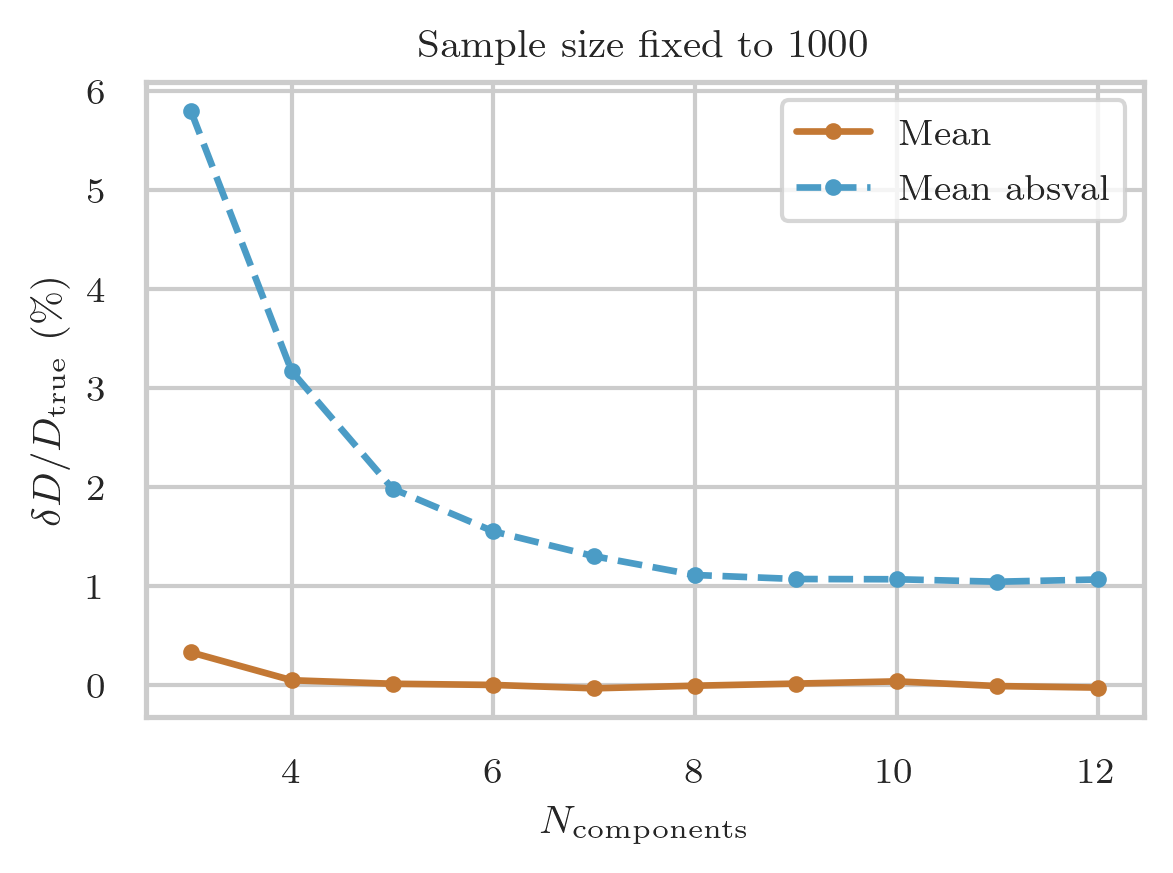

In [14]:
plt.plot(num_components, 100*component_means,
         color=colors[0], linestyle='-', marker='o', markersize=3, label='Mean')

bottom = 100*(component_means - cmp_std)
top = 100*(component_means + cmp_std)
#plt.fill_between(num_components, bottom, top, color=colors[0], alpha=0.1)

plt.plot(num_components, 100*abs_component_means,
         color=colors[1], linestyle='--', marker='o', markersize=3, label='Mean absval')

abs_bottom = np.max(
    (100*(abs_component_means - abs_cmp_std),
    np.zeros_like(abs_component_means)),
    axis=0,
)
abs_top = 100*(abs_component_means + abs_cmp_std)
#plt.fill_between(num_components, abs_bottom, abs_top, color=colors[1], alpha=0.1)

plt.legend(loc='best')
plt.xlabel(r'$N_\mathrm{components}$')
plt.ylabel(r'$\delta D/D_\mathrm{true}$' + ' (\%)')
plt.gcf().set_size_inches(4, 3)
plt.title('Sample size fixed to 1000')

plt.savefig('../figs/emulator-analysis/errors_by_components.pdf', bbox_inches='tight')
pass

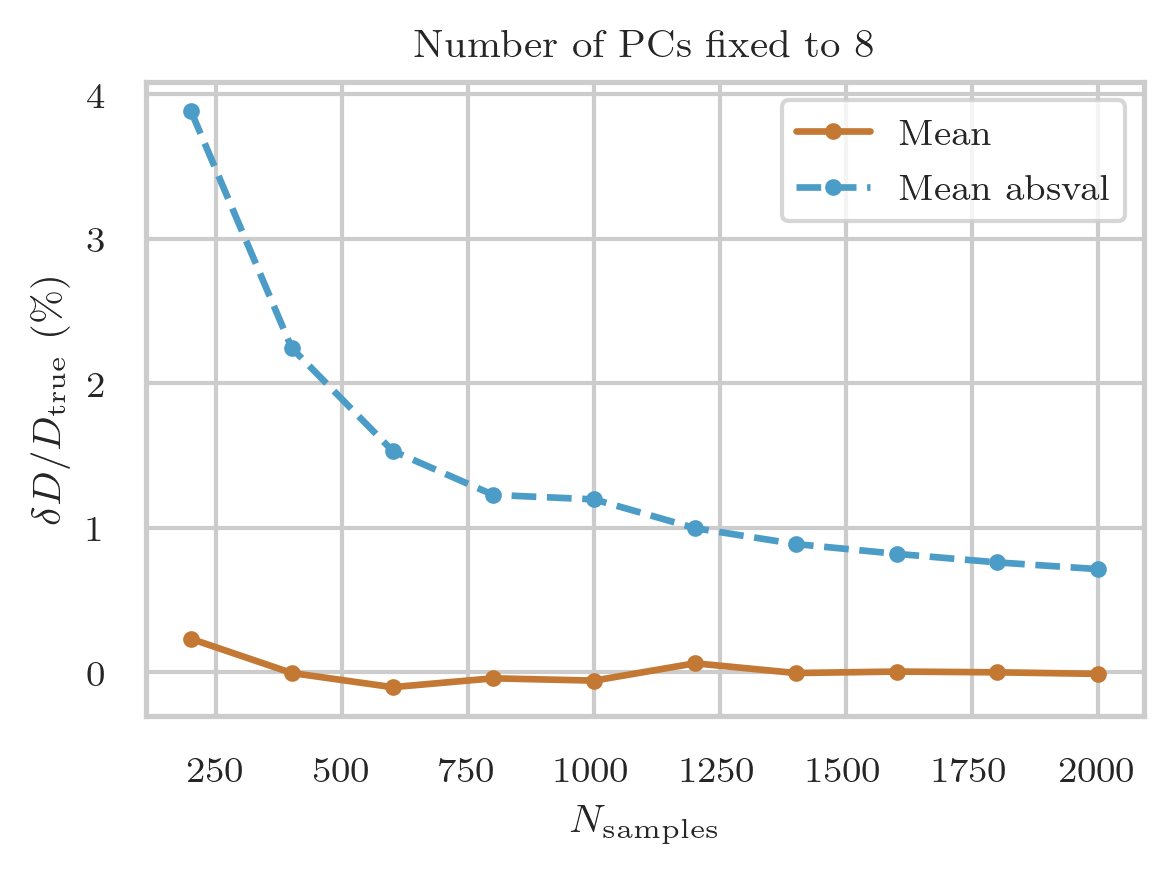

In [15]:
plt.plot(sample_sizes, 100*sample_means,
         color=colors[0], linestyle='-', marker='o', markersize=3, label='Mean')
plt.plot(sample_sizes, 100*abs_sample_means,
         color=colors[1], linestyle='--', marker='o', markersize=3, label='Mean absval')

plt.title('Number of PCs fixed to 8')

plt.legend(loc='best')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.ylabel(r'$\delta D/D_\mathrm{true}$' + ' (\%)')
plt.gcf().set_size_inches(4, 3)

plt.savefig('../figs/emulator-analysis/errors_by_sample_size.pdf', bbox_inches='tight')
pass

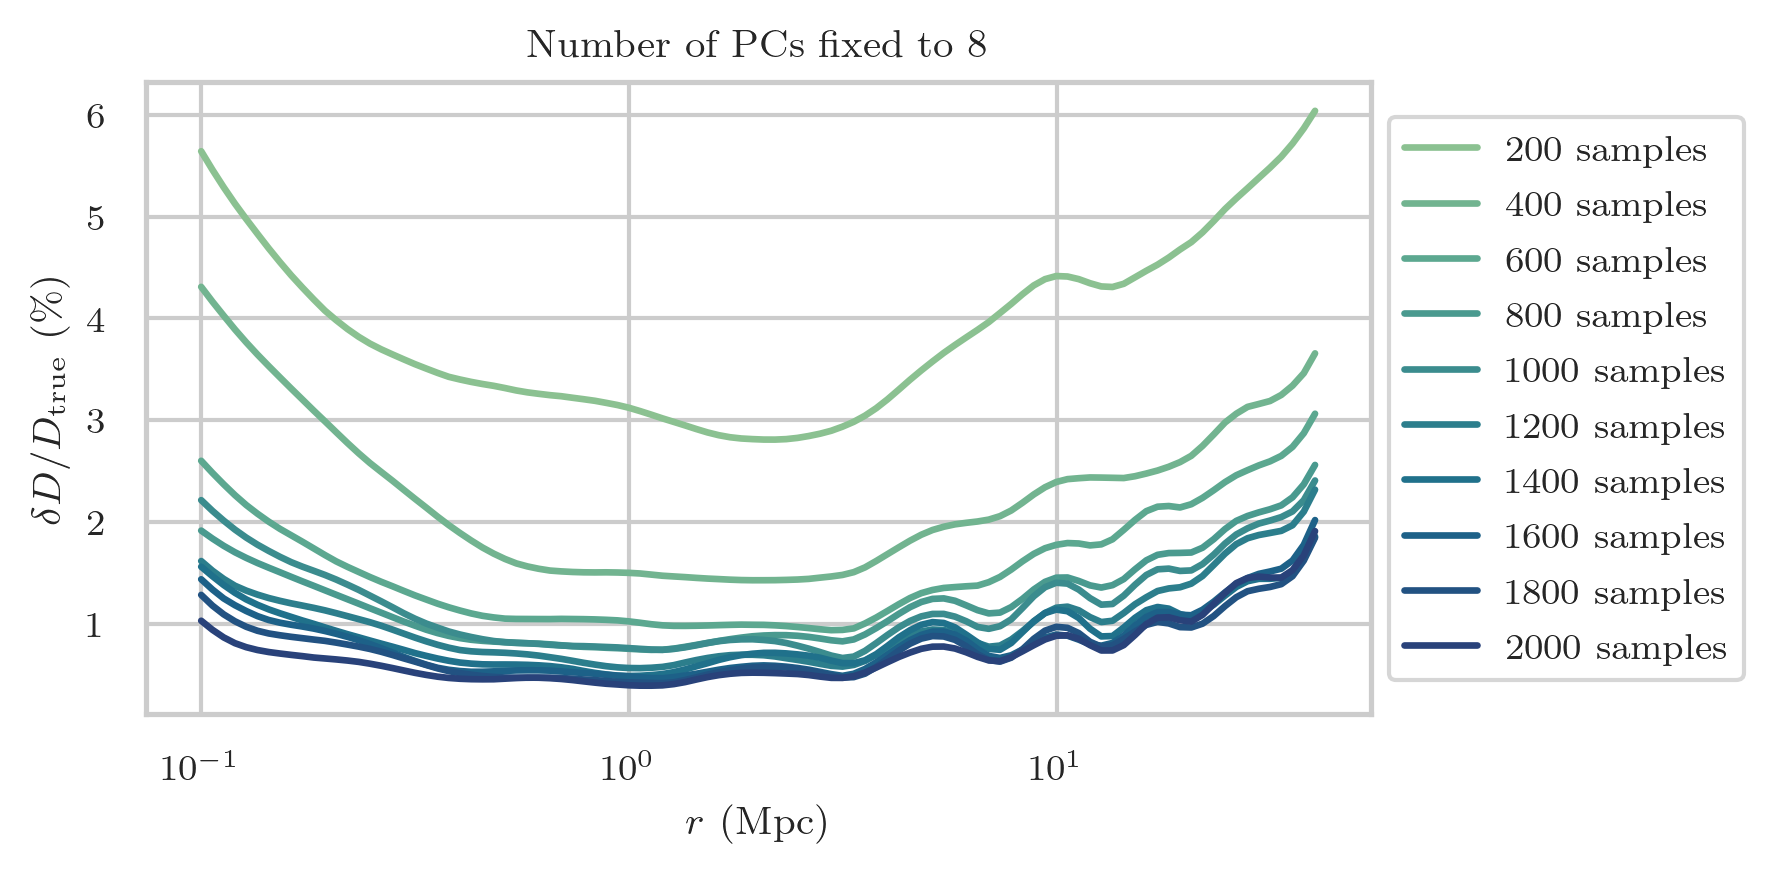

In [16]:
cmap = sns.color_palette('crest', sample_errors.shape[0])

for i, errs in enumerate(sample_errors):
    plt.plot(rs, 100*np.abs(errs).mean(axis=-1), color=cmap[i], linestyle='-',
             label=f'{sample_sizes[i]} samples')
plt.xscale('log')
plt.xlabel(r'$r$' + ' (Mpc)')
plt.ylabel(r'$\delta D/D_\mathrm{true}$' + ' (\%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().set_size_inches(6, 3)
plt.title('Number of PCs fixed to 8')
plt.savefig('../figs/emulator-analysis/radial_avg_errors.pdf', bbox_inches='tight')
pass

In [17]:
sample_errors.shape[0]

10

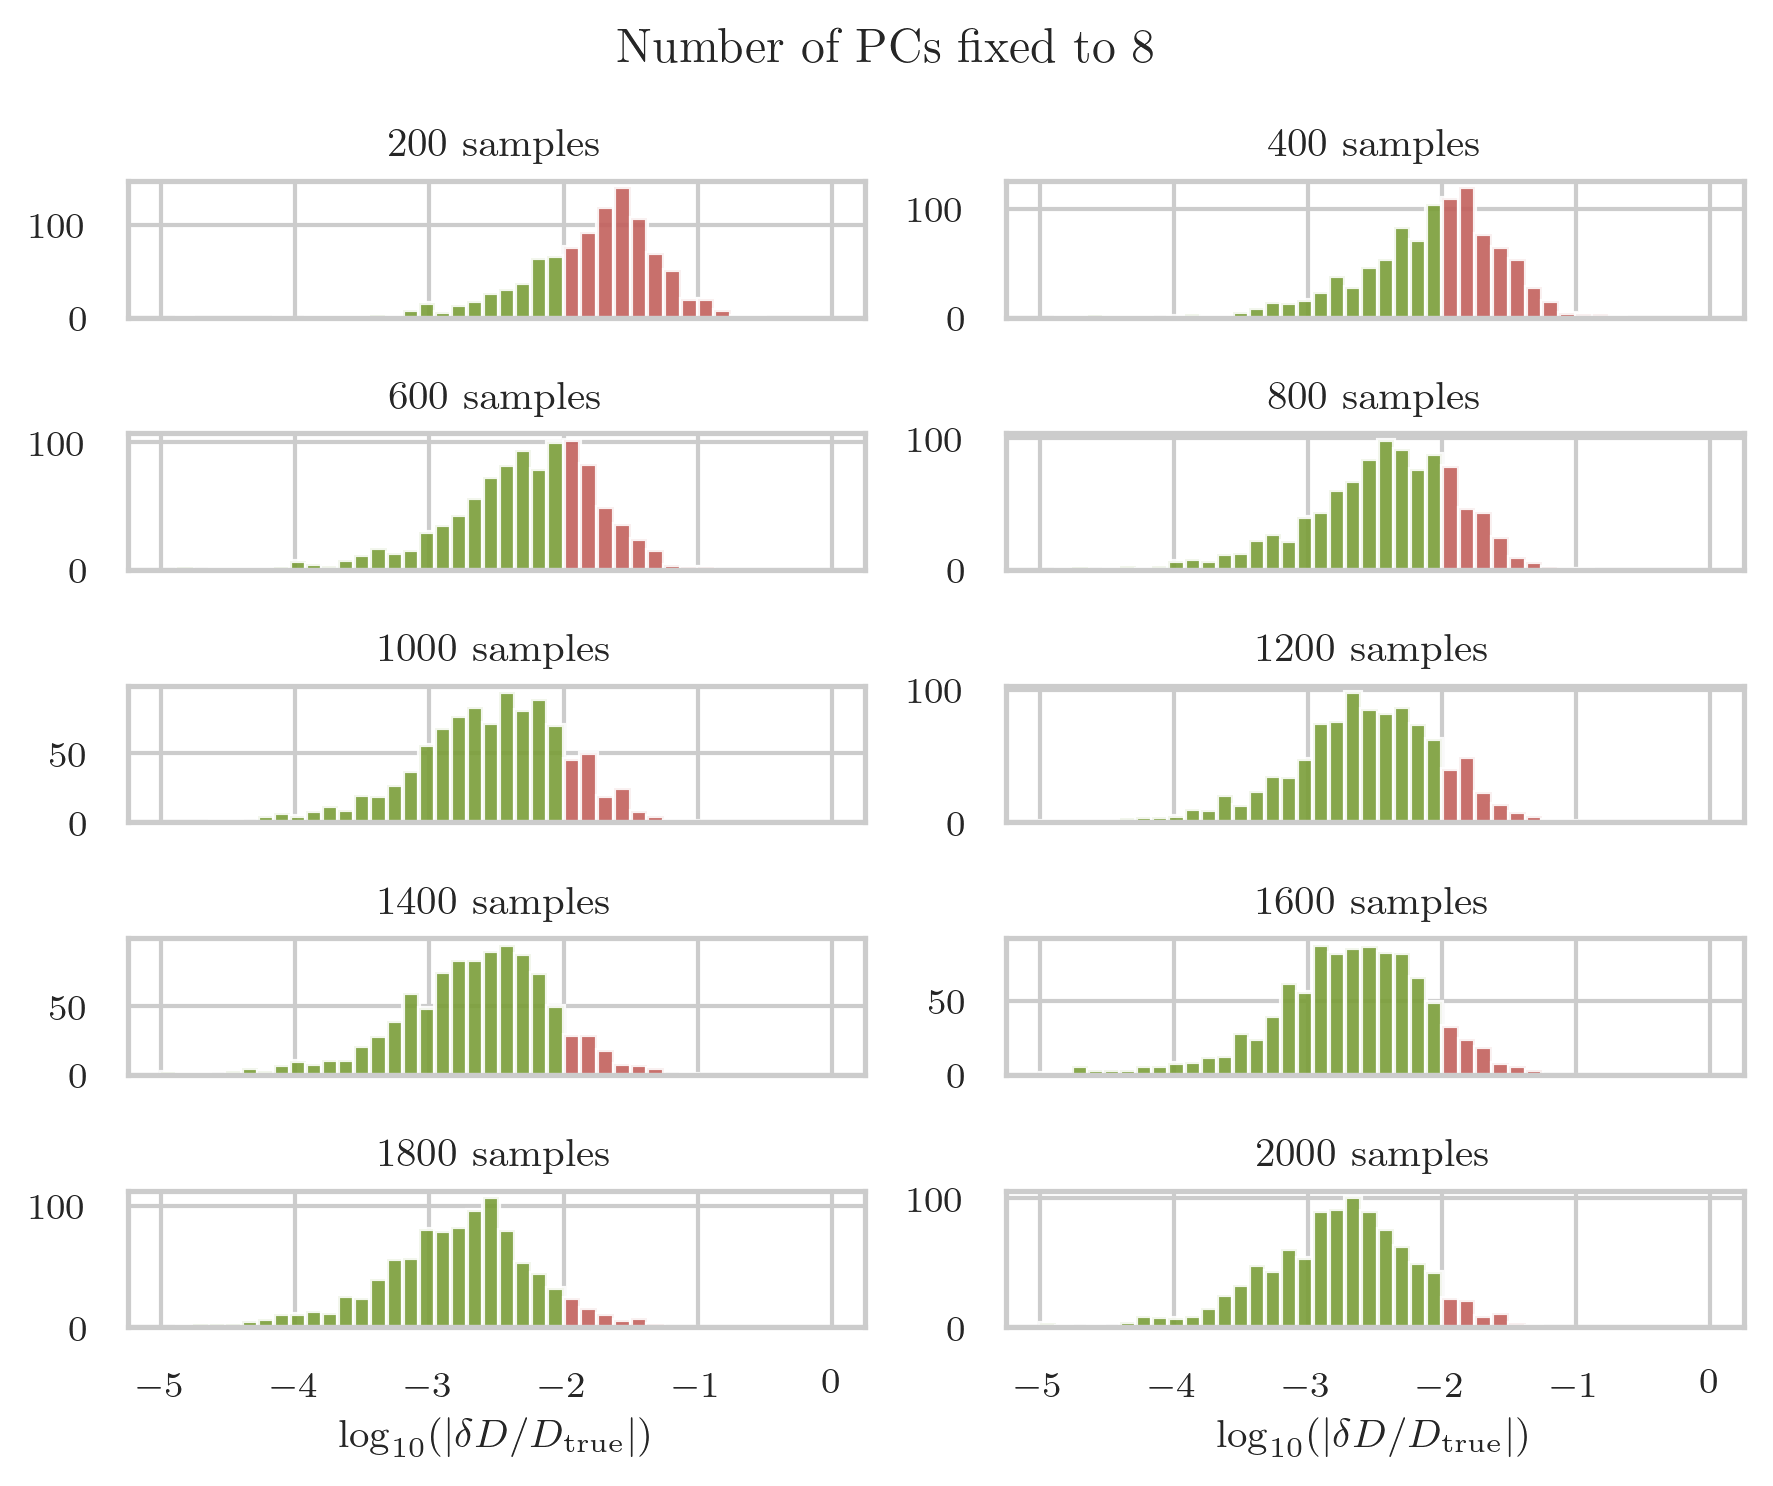

In [18]:
fig, axes = plt.subplots(sample_errors.shape[0]//2, 2, sharex=True)
log_ab_errs = np.log10(np.abs(sample_errors.mean(axis=1)))
for i, errs in enumerate(log_ab_errs):
    axes.flat[i].set_title(f'{sample_sizes[i]} samples')
    axes.flat[i].hist(errs, bins=25, alpha=0.9, color=colors[2], range=(-5, -2))
    axes.flat[i].hist(errs, bins=16, alpha=0.9, color=colors[3], range=(-2, 0))
axes.flat[-1].set_xlabel(r'$\log_{10}(|\delta D / D_\mathrm{true}|)$')
axes.flat[-2].set_xlabel(r'$\log_{10}(|\delta D / D_\mathrm{true}|)$')
fig.suptitle('Number of PCs fixed to 8')
plt.savefig('../figs/emulator-analysis/error_hists_by_sample_size.pdf', bbox_inches='tight')
plt.gcf().set_size_inches(6, 5)

In [19]:
sample_sizes

array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])

In [20]:
num_components

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
100*log_ab_errs[-1, :][log_ab_errs[-1, :] > -2].size/log_ab_errs[-1, :].size

6.8

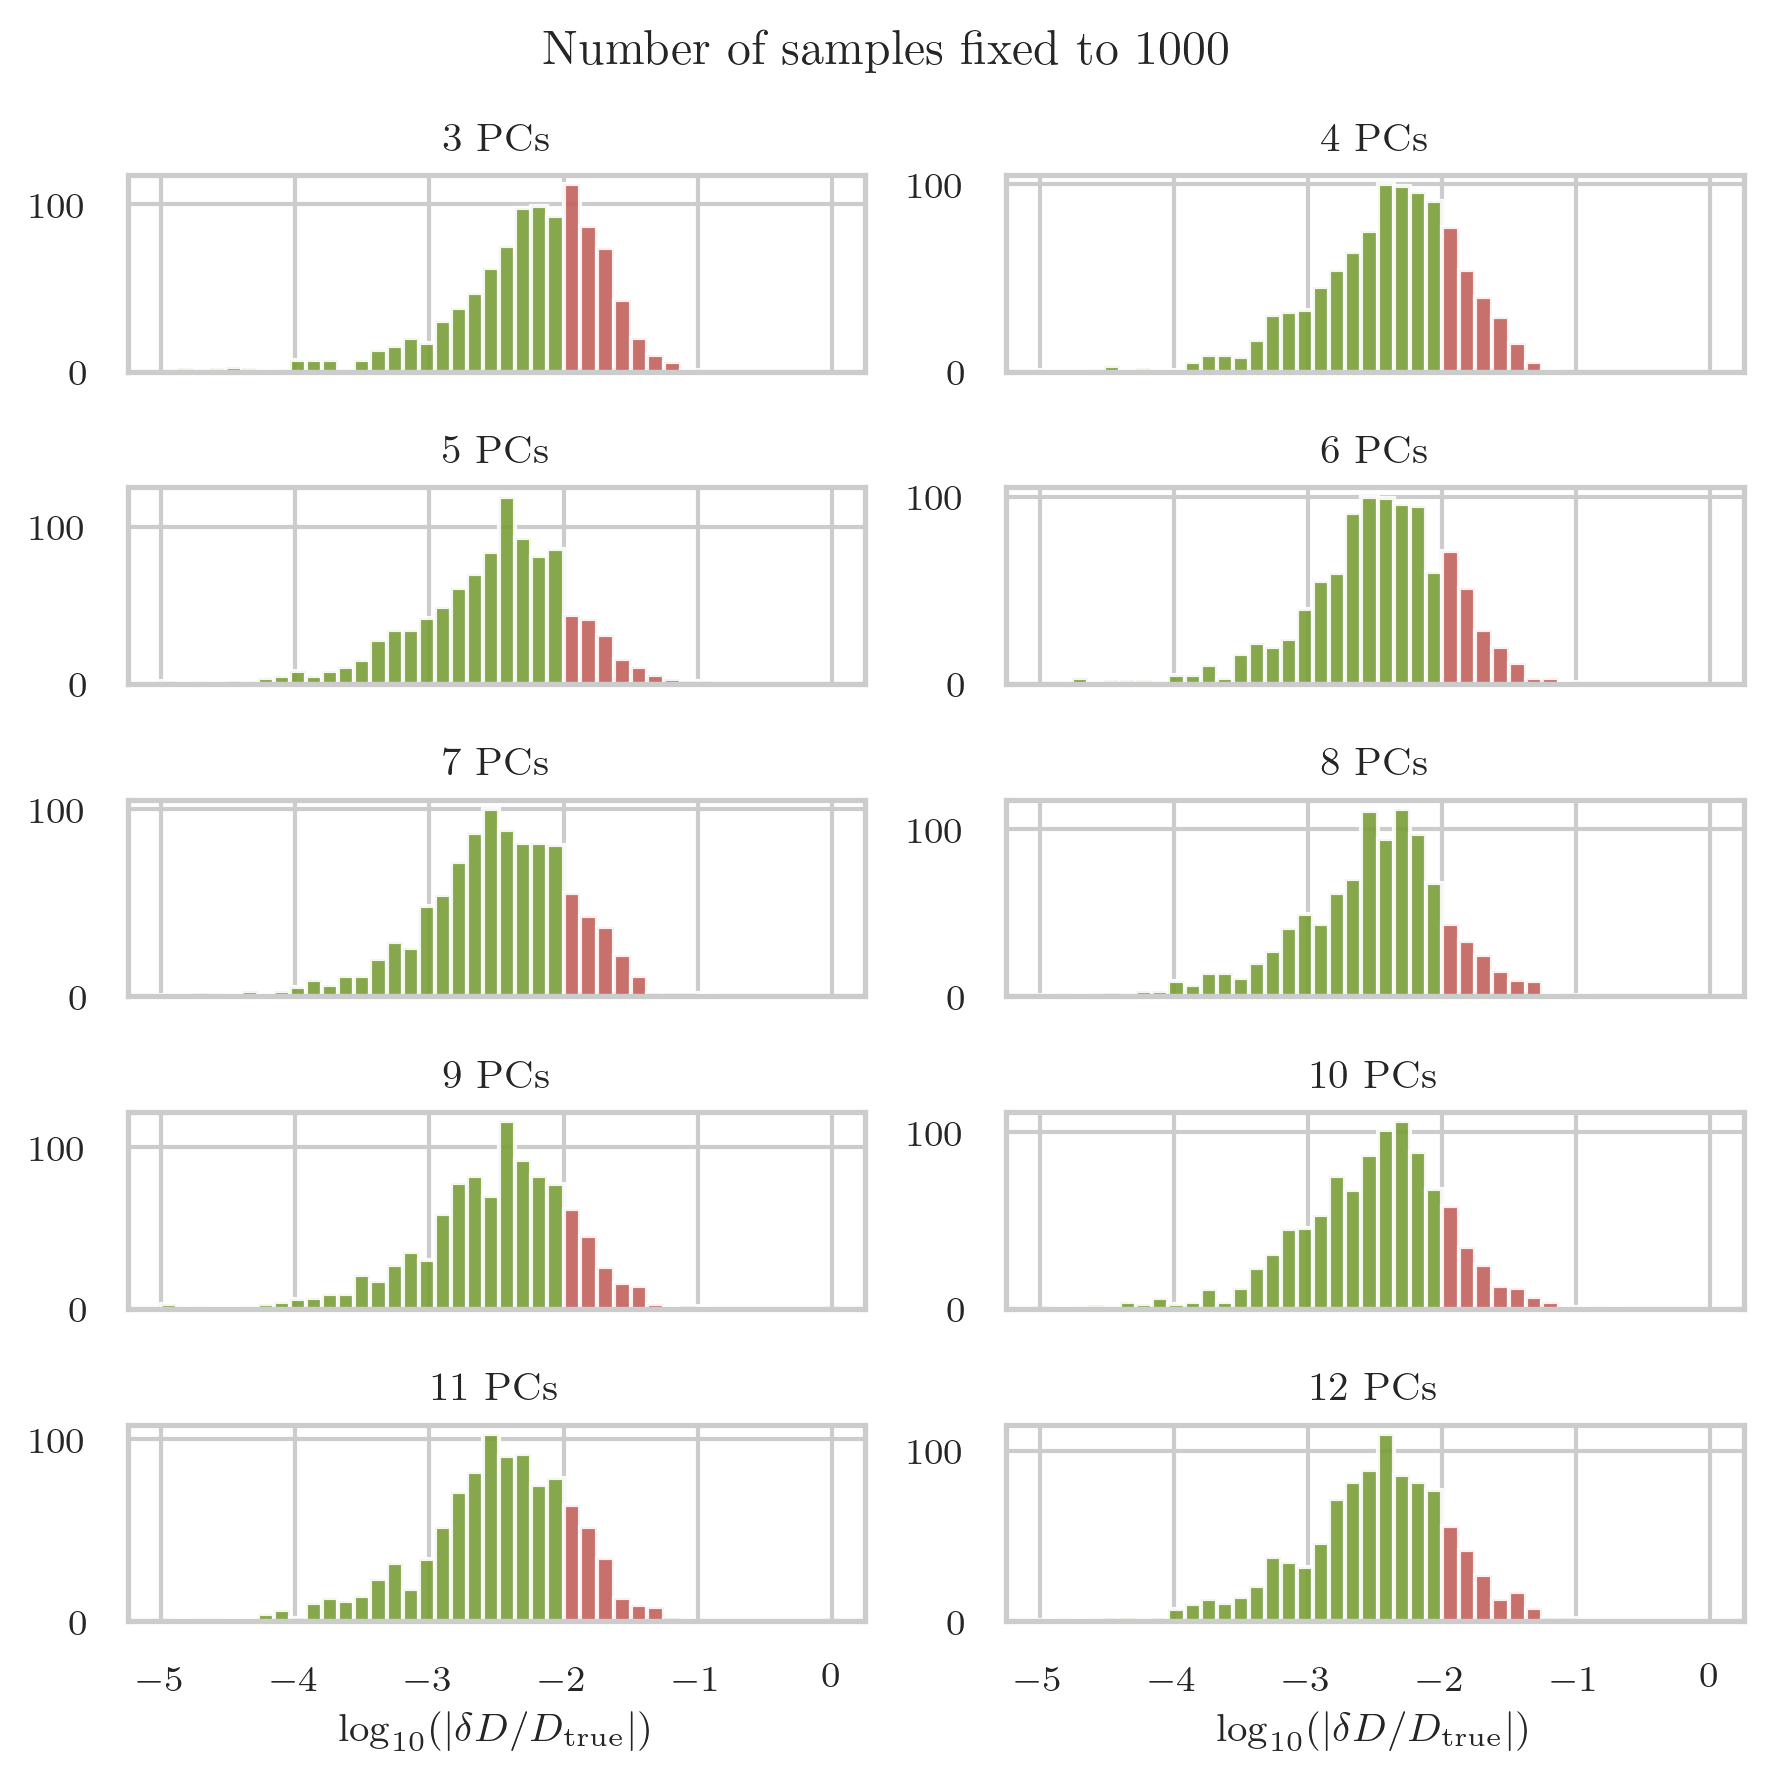

In [22]:
fig, axes = plt.subplots(component_errors.shape[0]//2, 2, sharex=True)
log_ab_errs = np.log10(np.abs(component_errors.mean(axis=1)))
for i, errs in enumerate(log_ab_errs):
    axes.flat[i].set_title(f'{num_components[i]} PCs')
    axes.flat[i].hist(errs, bins=25, alpha=0.9, color=colors[2], range=(-5, -2))
    axes.flat[i].hist(errs, bins=16, alpha=0.9, color=colors[3], range=(-2, 0))
axes.flat[-1].set_xlabel(r'$\log_{10}(|\delta D / D_\mathrm{true}|)$')
axes.flat[-2].set_xlabel(r'$\log_{10}(|\delta D / D_\mathrm{true}|)$')
fig.suptitle('Number of samples fixed to 1000')
plt.savefig('../figs/emulator-analysis/error_hists_by_components.pdf', bbox_inches='tight')
plt.gcf().set_size_inches(6, 6)

In [23]:
def percent_above_1percent(err, axis=None):
    abs_errors = np.abs(err)
    return 100 * abs_errors[abs_errors > 0.01].size/abs_errors.size


def percent_above_1percent_radial_mean(err, axis=None):
    abs_errors = np.abs(err).mean(axis=0)
    return 100 * abs_errors[abs_errors > 0.01].size/abs_errors.size

In [24]:
sample_above_1ps = np.array([percent_above_1percent(err) for err in sample_errors])
component_above_1ps = np.array([percent_above_1percent(err) for err in component_errors])

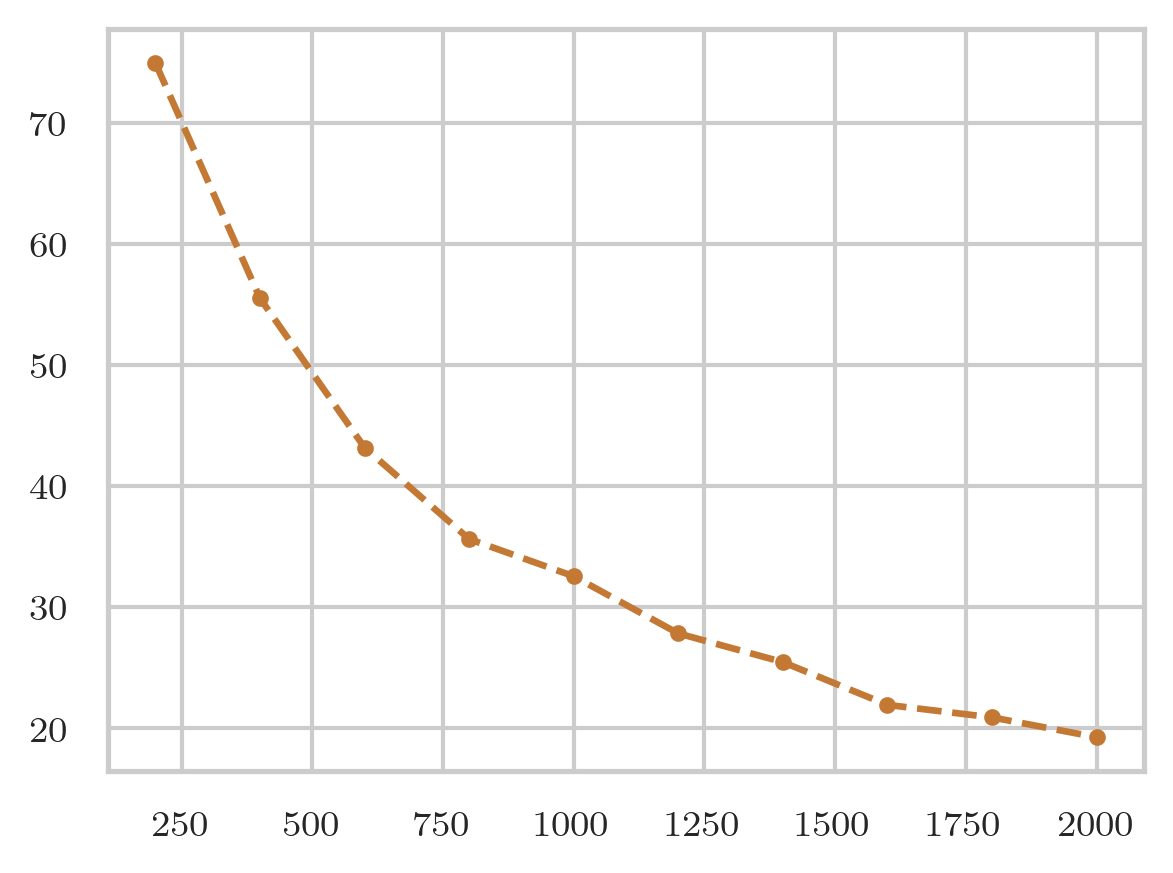

In [25]:
plt.plot(sample_sizes, sample_above_1ps, color=colors[0], marker='o', markersize=3, linestyle='--')
plt.gcf().set_size_inches(4, 3)
pass

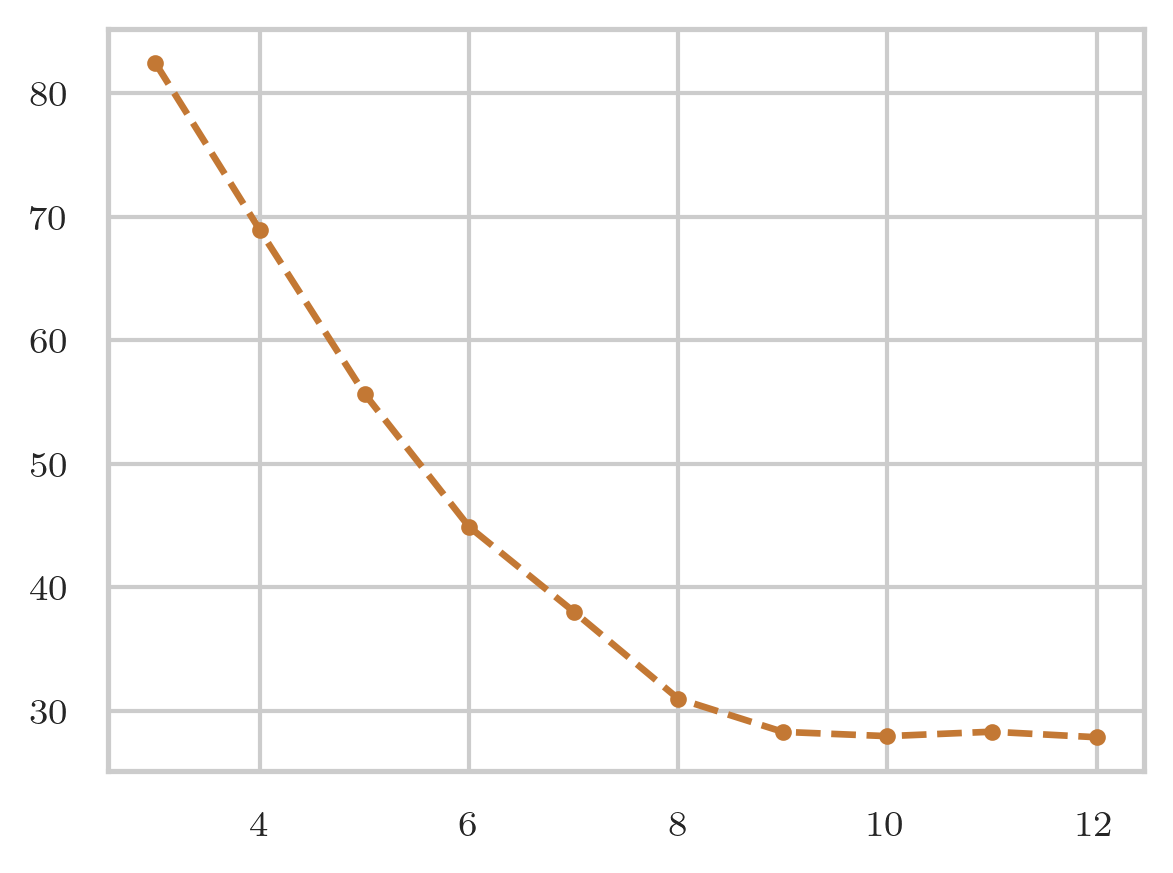

In [23]:
plt.plot(num_components, component_above_1ps, color=colors[0], marker='o', markersize=3, linestyle='--')
plt.gcf().set_size_inches(4, 3)
pass